In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_train_path = "train"

idg = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.2,

    # data augmentation
    rotation_range=40,
    zoom_range=0.4,
    horizontal_flip=True,

)

dataset_train = idg.flow_from_directory(
    dataset_train_path,
    shuffle=True,
    save_to_dir="train_augmentation",
    subset="training",
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_train_path,
    shuffle=True,
    subset="validation",
    target_size=(224, 224)
)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [3]:
model = models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation="relu", padding="same", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    layers.Dense(17, activation="softmax"),
])

d:\Program Files\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [11]:
# dataset_train = x_train & y_train
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=30)

# training and evaluating simultaneously:

Epoch 1/30


d:\Program Files\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0841 - loss: 2.8105 - val_accuracy: 0.2030 - val_loss: 2.4280
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.1722 - loss: 2.4394 - val_accuracy: 0.2640 - val_loss: 2.1761
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2456 - loss: 2.2150 - val_accuracy: 0.3959 - val_loss: 1.8513
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.3437 - loss: 1.9524 - val_accuracy: 0.4365 - val_loss: 1.6336
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4444 - loss: 1.6693 - val_accuracy: 0.4975 - val_loss: 1.3928
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.4704 - loss: 1.5991 - val_accuracy: 0.5482 - val_loss: 1.3518
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4880 - loss: 1.4276 - val_accuracy: 0.5381 - val_loss: 1.2428
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5079 - loss: 1.4396 - val_accuracy: 0.4822 - val_loss: 1.3709
Epo

In [6]:
loss , accuracy = model.evaluate(dataset_validation)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

d:\Program Files\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 865ms/step - accuracy: 0.7293 - loss: 0.9237
validation loss: 0.9177018404006958
validation accuracy: 0.7258883118629456


In [29]:
model.save("weights/17_flowers_weights.h5")

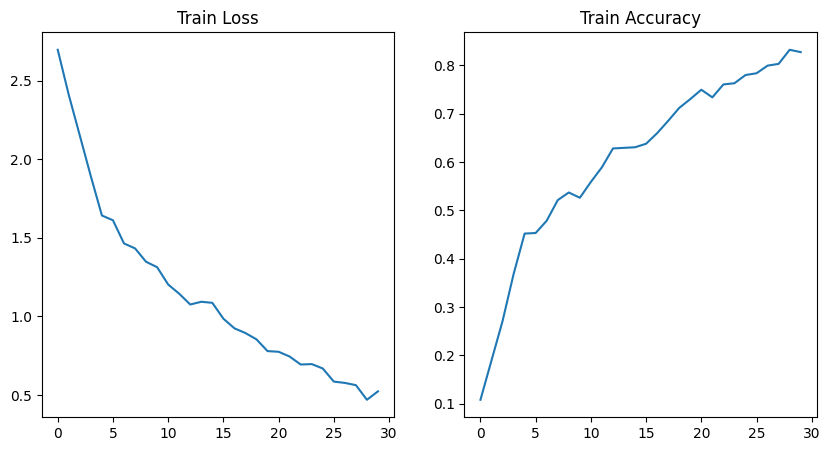

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history.history['loss'])
ax1.set_title("Train Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Train Accuracy")
plt.show()

In [22]:
dataset_test_path = "test"

idg = ImageDataGenerator(
    rescale=1/255
)

dataset_test = idg.flow_from_directory(
    dataset_test_path,
    shuffle=False,
    target_size=(224, 224)
)

Found 340 images belonging to 17 classes.


In [26]:
loss , accuracy = model.evaluate(dataset_test)
print("test loss:" , loss)
print("test accuracy:" ,accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.6596 - loss: 1.3895
test loss: 1.1239863634109497
test accuracy: 0.720588207244873


In [3]:
model = tf.keras.models.load_model('weights/17_flowers_weights.h5')

In [8]:
y_pred = model.predict(dataset_test)
y_predict = np.argmax(y_pred , axis=1)

NameError: name 'dataset_test' is not defined

In [32]:
y_pred

array([[9.9286109e-01, 9.0210076e-11, 6.3428879e-10, ..., 5.0192384e-09,
        6.1394068e-10, 2.2525441e-05],
       [9.9634081e-01, 6.0702239e-09, 4.7576814e-09, ..., 6.7284518e-08,
        9.9156710e-09, 4.1137333e-05],
       [9.9207896e-01, 3.0548905e-12, 4.4313425e-10, ..., 4.1564365e-09,
        4.9730291e-09, 9.2149701e-09],
       ...,
       [2.5384143e-06, 2.5228201e-05, 1.0869172e-03, ..., 5.5459709e-06,
        4.3603316e-01, 5.1006567e-02],
       [4.1477457e-03, 1.9599011e-06, 1.7049955e-05, ..., 9.0420683e-05,
        6.6307368e-04, 8.8085480e-02],
       [2.3077539e-04, 2.2555529e-05, 1.6941687e-04, ..., 1.2216612e-04,
        3.9489988e-02, 3.1741494e-01]], dtype=float32)

In [33]:
y_predict

array([ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0, 12, 10,  0, 12,  0,
        0,  0, 12, 12,  1,  5,  1,  2,  7,  2, 13,  2,  3,  2,  7,  1, 15,
        3,  1,  1,  2, 15,  3, 15,  7,  2,  2,  7,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2, 15, 15, 15, 14,  4, 14,  3,  3,  3,  3, 15,
        3,  3,  3, 15, 10,  3,  3,  3,  7, 12,  3,  3,  3,  3,  4,  4,  8,
        4,  6, 15,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  2,  2,  5,  5, 13,  3,  5,  5,  2,  7,  5,  2,  5,  7,  4,  5,
       15,  5, 15, 15,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  2,  6,  9, 15,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  2,  9,  7,  7,  7,  2,  3, 14,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8, 16,  4,  8,  8,  8,  8,  8,  4,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  0,  9,  9,  9,  9,  9,  9,  9,
        9, 14, 12, 12, 12, 10, 12, 10, 14, 10, 10, 10, 10, 12, 12, 10, 10,
       10, 10, 10, 10, 10

In [35]:
dataset_validation.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16])

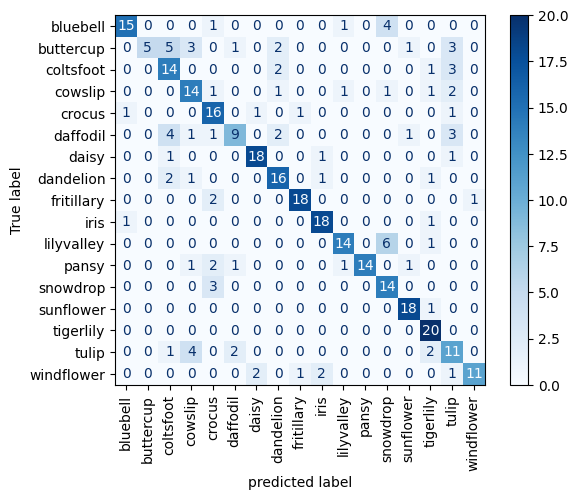

In [39]:
from sklearn import metrics

confusion_mat = metrics.confusion_matrix(dataset_test.classes, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, 
            display_labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil',
                              'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy',
                              'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower'])

cm_display.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

### inference code:

In [22]:
import cv2

image = cv2.imread("sunflower.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224, 224))
image = image // 255.0
image = image.reshape(1, 224, 224, 3)

output = model.predict(image)
predicted_class = np.argmax(output)

labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil',
          'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy',
          'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

labels[predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'sunflower'